In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
SD = 0.05 * (0.8 ** 6) # -4 ... 10 
print('SD:', SD)

SD: 0.013107200000000006


In [4]:
DATA = '../models/qp/data'
SYMBOLS = [
    'ABMD', 'ABNB', 'AMZN', 'ANET', 'APPH', 'ATVI', 'AXON', 'AYX', 
    'BILI', 'BYND', 'COUR','CPNG', 'DDOG', 'DOCU', 'DUOL', 'EDIT', 
    'ETSY', 'FSLY', 'FUV', 'GH', 'GMED', 'INTG', 'ISRG', 'JD', 
    'LULU', 'LUV', 'MDB', 'MELI', 'MNST', 'MTCH', 'NVCR', 'OKTA', 
    'PANW', 'PINS', 'PTON', 'QDEL', 'RDFN', 'RGEN', 'ROKU', 'SE', 
    'SHOP', 'SPLK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 
    'TWTR', 'UPST', 'VEEV', 'ZEN', 'ZG', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

53

In [5]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = (datetime.now() + timedelta(1)).date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2021, 8, 28))

In [6]:
batcher = Batcher(SYMBOLS, INDICES)
batch = batcher.get_batch_from_weekday(TODAY.weekday())
batch

['TTD', 'TTWO', 'TWLO', 'TWTR', 'UPST', 'VEEV', 'ZEN', 'ZG', 'ZNGA', '^IXIC']

In [7]:
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  10 of 10 completed
Generating derived columns...
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...ZEN
   ...ZG
   ...ZNGA
   ...^IXIC


In [8]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [9]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [10]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {
                str_to_tuple(k): v 
                for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data. '
              'Initialized as None.')

In [11]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {
            str(k): v 
            for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [12]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [13]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 TTD
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 13.09619226252864
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 13.09619226252864
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning rel_minmax method...
--------------------------------------------------
Do nothing returns: 13.09619226252864
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_rel_minmax method...
---------------------------------------

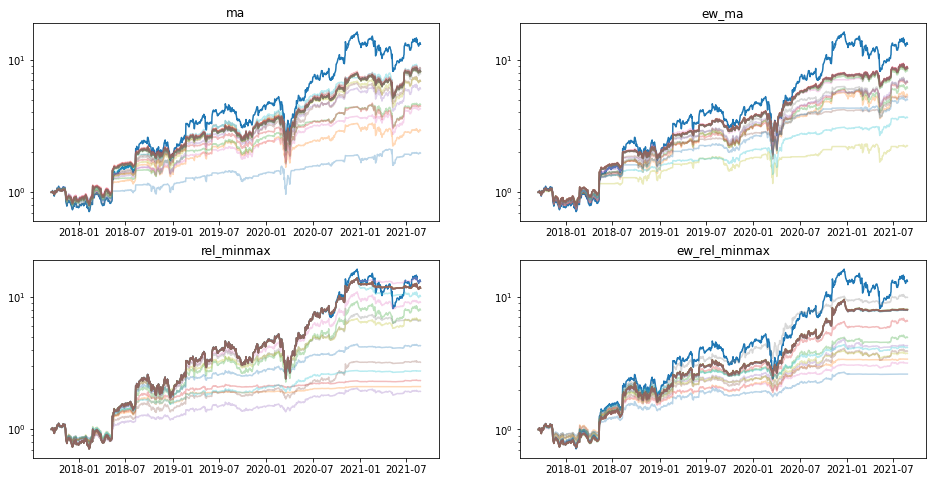

Saving TTD params...



----------------------------------------------------------------------
                                 TTWO
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 12.203518454993281
Refitting current best...
Current best ma returns: 17.330886097882576
Fraction Invested: 0.9976240440813722
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 17.330791672605802
Invested: 0.9976240440813722
New best: 17.33032242335159
Invested: 0.9976240440813722
New best: 13.849497282473145
Invested: 0.9976240440813722
New best: 13.846948819613564
Invested: 0.9976240440813722
New best: 13.84724293918706
Invested: 0.9976240440813722
New best: 13.79687348300195
Invested: 0.9976240440813722
New best: 13.7968206981019
Invested: 0.9976240440813722
New best: 13.842323763108794
Invested: 0.9976240440813722
New best: 13.7976488841406


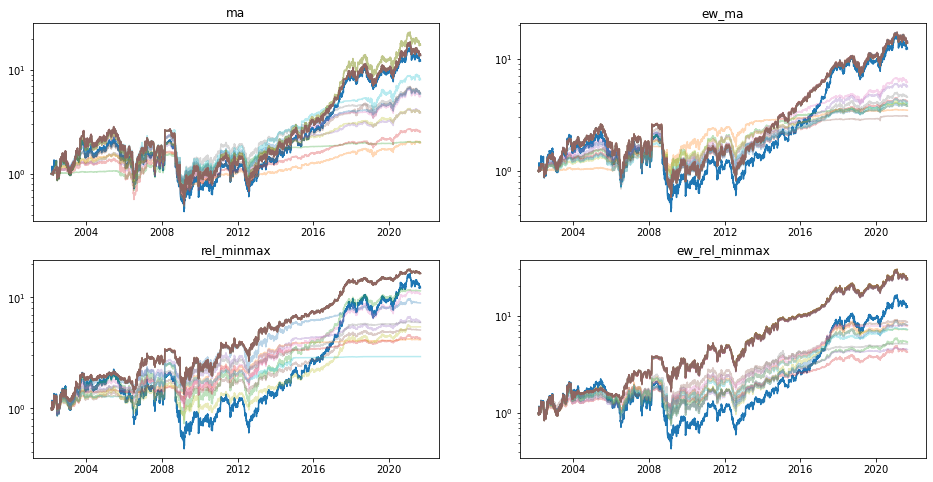

Saving TTWO params...



----------------------------------------------------------------------
                                 TWLO
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 12.50900782632792
Refitting current best...
Current best ma returns: 13.508285225673786
Fraction Invested: 0.9982884246416853
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 13.508195572748948
Invested: 0.9982884246416853
New best: 13.508749851299692
Invested: 0.9982884246416853
New best: 13.508650347874244
Invested: 0.9982736967166271
New best: 13.508650347874244
Invested: 0.9982736967166271
New best: 14.474716449679923
Invested: 0.9982736967166271
New best: 14.474716449679923
Invested: 0.9982736967166271
New best: 14.570134647528066
Invested: 0.9982736967166271
New best: 14.55077041425888
Invested: 0.9982736967166271
New best: 14.5497128963

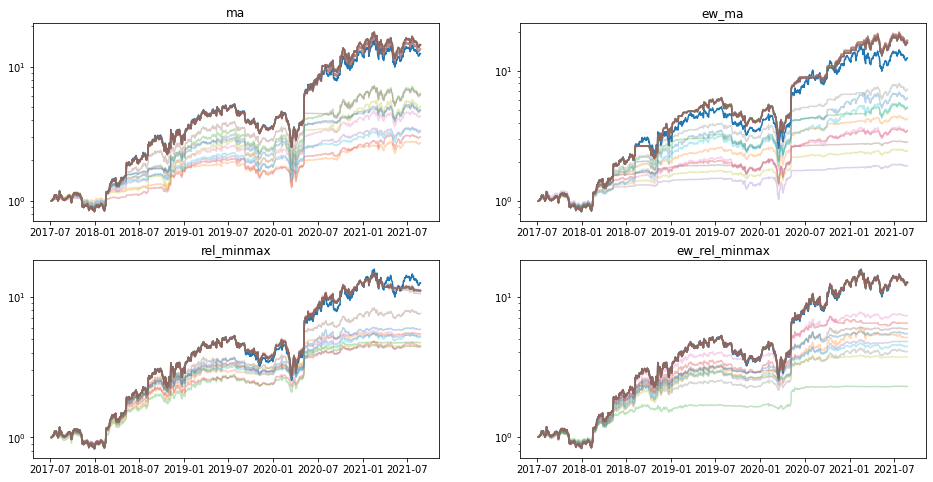

Saving TWLO params...



----------------------------------------------------------------------
                                 TWTR
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 1.720054889718574
Refitting current best...
Current best ma returns: 1.750956297525149
Fraction Invested: 0.760044722621522
Beginning random search...
New best: 1.7613962108904193
Invested: 0.8530278306249305
New best: 1.7991770348159315
Invested: 0.7352505755006581
New best: 2.31073028073568
Invested: 0.8021508123582802
Round: 10
Beginning adjusted search...
New best: 2.3074219193360213
Invested: 0.8021508123582802
New best: 2.302665640308839
Invested: 0.8021508123582802
New best: 2.332314390418533
Invested: 0.8021508123582802
New best: 2.329558584596251
Invested: 0.8021508123582802
New best: 2.142782504113983
Invested: 0.8021508123582802
New best: 2.1598211023370038
I

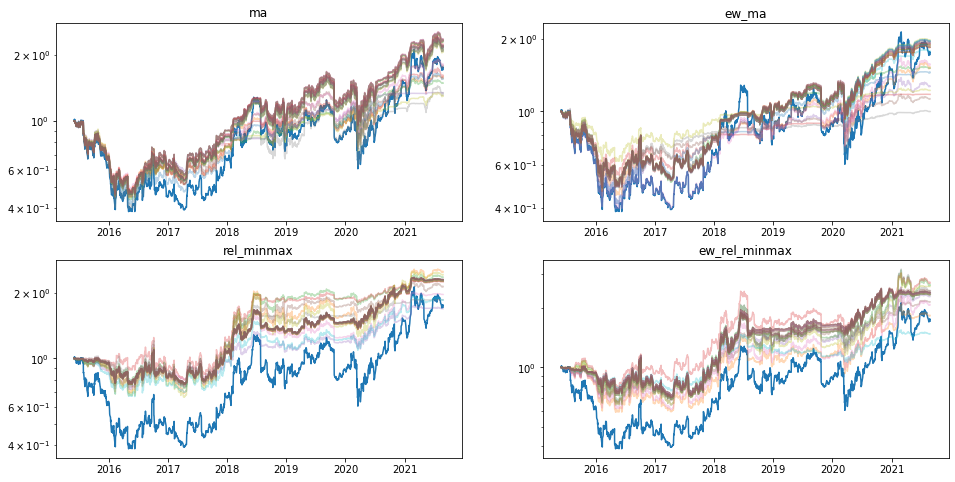

Saving TWTR params...



----------------------------------------------------------------------
                                 UPST
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 2.851973684210526
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 106
Beginning adjusted search...
Round: 152 9


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 2.851973684210526
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 9 6 10
Beginning adjusted search...
Round: 159 14


Beginning rel_minmax method...
--------------------------------------------------
Do nothing returns: 2.851973684210526
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 102
Beginning adjusted search...
New best: 3.019023827343405
Invested: 0.317341652

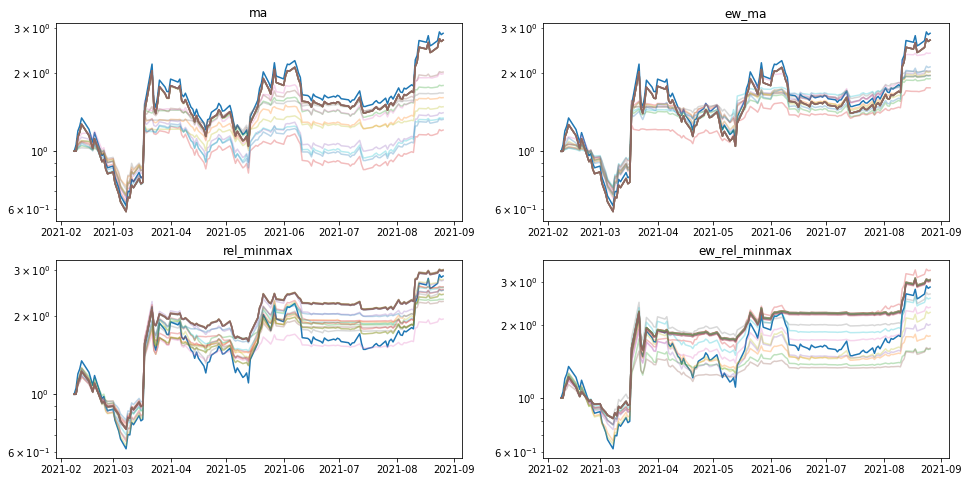

Saving UPST params...



----------------------------------------------------------------------
                                 VEEV
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 11.797891488850262
Refitting current best...
Current best ma returns: 12.100965851056642
Fraction Invested: 0.9998242020677357
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 12.095260786386715
Invested: 0.9998242020677357
New best: 12.095260786386715
Invested: 0.9998242020677357
New best: 12.084162991772065
Invested: 0.9998242020677357
New best: 12.074510749733772
Invested: 0.9998242020677357
New best: 12.074528369080667
Invested: 0.9998242020677357
New best: 12.074528369080667
Invested: 0.9998242020677357
New best: 12.07453453766141
Invested: 0.9998242020677357
New best: 12.070014601817107
Invested: 0.9998242020677357
New best: 12.080999914

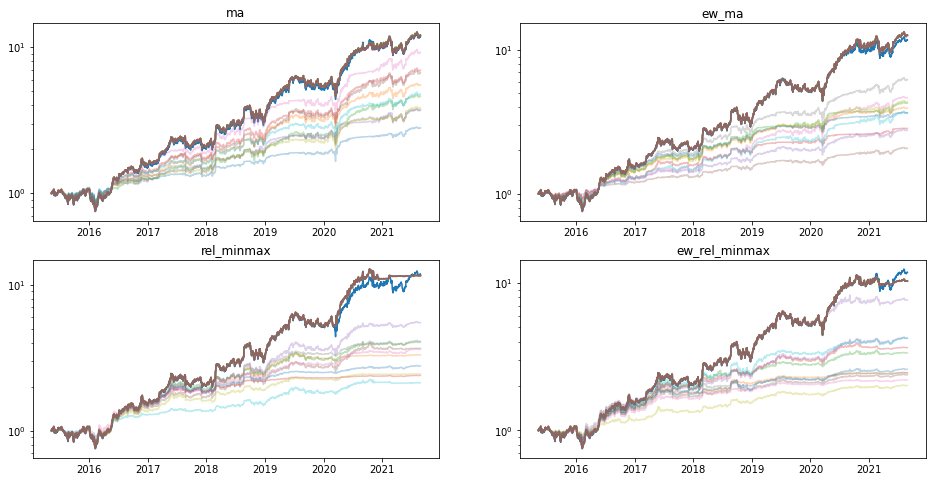

Saving VEEV params...



----------------------------------------------------------------------
                                 ZEN
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 6.255979780745174
Refitting current best...
Current best ma returns: 6.282578979103492
Fraction Invested: 0.9985401829831597
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 6.280809228500439
Invested: 0.9985401829831597
New best: 6.465385112520602
Invested: 0.9985401829831597
New best: 6.465564969087459
Invested: 0.9985401829831597
New best: 6.464976029555667
Invested: 0.9985401829831597
New best: 6.4620185249839475
Invested: 0.9985401829831597
New best: 6.461903081384533
Invested: 0.9985401829831597
New best: 6.456984085043341
Invested: 0.9985401829831597
New best: 6.492097587626633
Invested: 0.9985401829831597
New best: 6.493544527144551
Inv

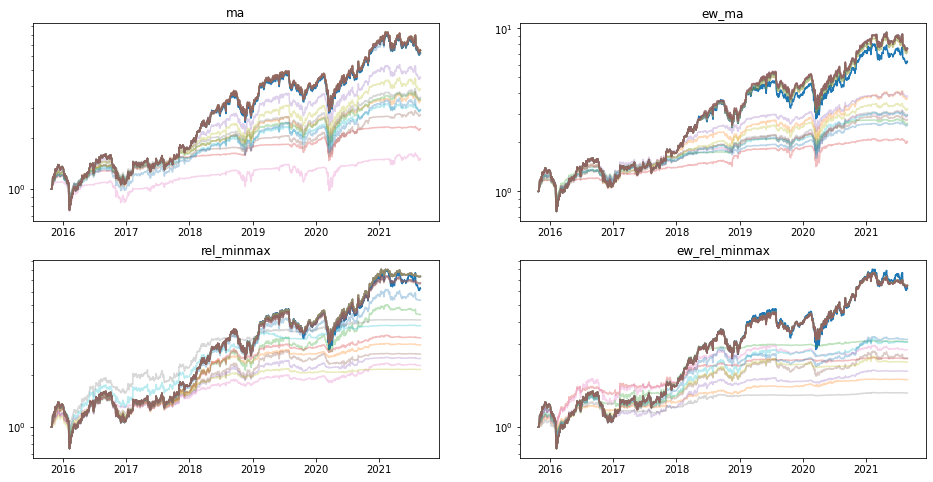

Saving ZEN params...



----------------------------------------------------------------------
                                 ZG
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 4.246088549709714
Refitting current best...
Current best ma returns: 4.481870635718852
Fraction Invested: 0.9993533028123411
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 4.468682421769225
Invested: 0.9993533028123411
New best: 4.589551741498359
Invested: 0.9993533028123411
New best: 4.587609348446885
Invested: 0.9993533028123411
New best: 4.587609348446885
Invested: 0.9993533028123411
New best: 4.587525674148473
Invested: 0.9993533028123411
New best: 4.471777924966449
Invested: 0.9993533028123411
New best: 4.821844597846922
Invested: 0.9993533028123411
New best: 4.964905985920535
Invested: 0.9993533028123411
New best: 4.964905985920535
Invest

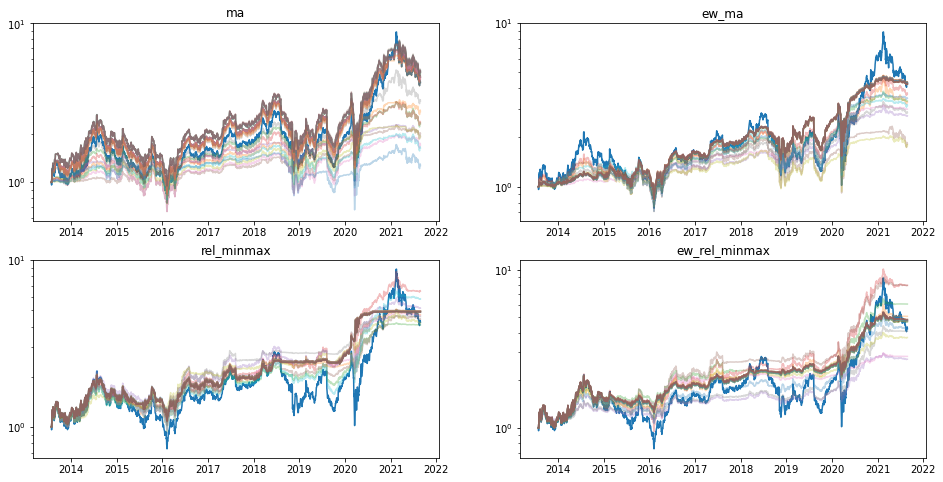

Saving ZG params...



----------------------------------------------------------------------
                                 ZNGA
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 1.9466667175292969
Refitting current best...
Current best ma returns: 2.1203827181389867
Fraction Invested: 0.9837593306597764
Beginning random search...
New best: 2.0904746792271798
Invested: 0.8912743277478699
Round: 10
Beginning adjusted search...
New best: 2.095490844332395
Invested: 0.8912743277478699
New best: 2.0920973536271816
Invested: 0.8912743277478699
New best: 2.072036475899247
Invested: 0.8912743277478699
New best: 2.072036475899247
Invested: 0.8912743277478699
New best: 2.056440427036792
Invested: 0.8912743277478699
New best: 2.108111346999706
Invested: 0.8912743277478699
New best: 2.0590688332164593
Invested: 0.8912743277478699
New best: 2.031383735900863


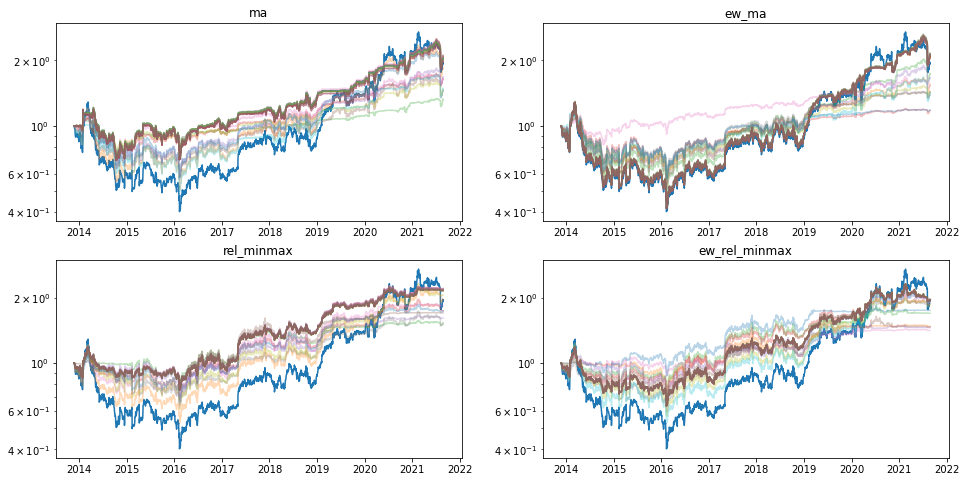

Saving ZNGA params...



----------------------------------------------------------------------
                                 ^IXIC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 35.80692330824297
Refitting current best...
Current best ma returns: 37.08271583284013
Fraction Invested: 0.9720331582370679
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 37.08271583284013
Invested: 0.9720331582370679
New best: 37.09487035721413
Invested: 0.9720331582370679
New best: 36.899009406788544
Invested: 0.9720331582370679
New best: 36.89863635434325
Invested: 0.9720331582370679
New best: 36.8931328637049
Invested: 0.9720331582370679
New best: 36.902660177194235
Invested: 0.9720331582370679
New best: 36.996253692737355
Invested: 0.9720331582370679
New best: 36.27338148683489
Invested: 0.9720331582370679
New best: 36.2795691745826
I

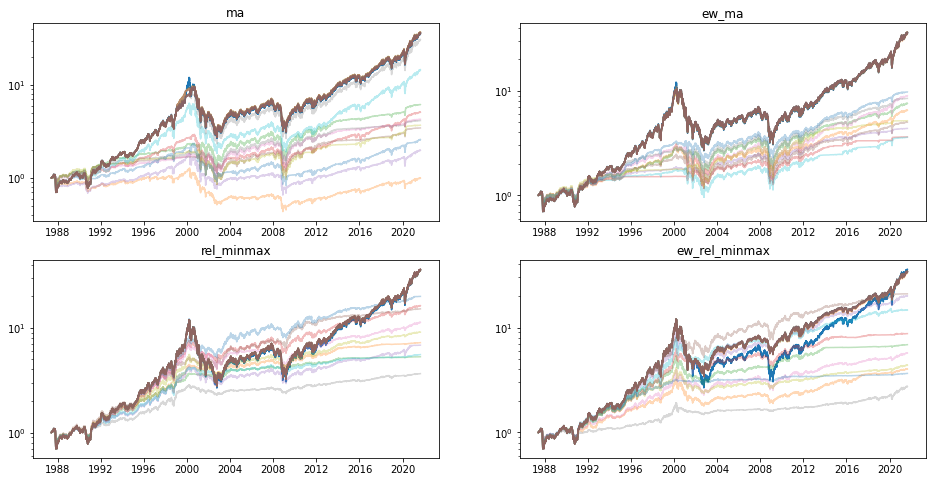

Saving ^IXIC params...


In [14]:
N_RAND = 10
N_ADJ = 15

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    try:
        best_params, best_returns = read_best_params(stock)
        stock_data = get_stock_data(stock, data)
        stock_data.fillna(method='ffill', inplace=True)
        stock_data.fillna(method='bfill', inplace=True)
        qp = QPercent(stock_data, 
                      N_CUTS, 
                      best_param_set=best_params, 
                      best_returns=best_returns, 
                      sd=SD)
        qp.run_sims(N_RAND, N_ADJ)
        best = get_best_param_set(qp)
        save_best_param_set(best, stock)
    except BaseException as e:
        print(f'Error encountered\n{e}')

In [15]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} '
                  f'({best_method})\n  {100 * best_pct:.2f}% in')
        except FileNotFoundError:
            print('No data for', stock)
            continue
        except:
            print('Bad Data for', stock)
            continue

In [16]:
ALL = SYMBOLS + INDICES
#get_summary(ALL)
get_summary(batch)


TTD:
  Best Return: 13.09619226252864 (ma)
  100.00% in

TTWO:
  Best Return: 23.249636973844922 (ew_rel_minmax)
  30.04% in

TWLO:
  Best Return: 16.387579081832918 (ew_ma)
  99.87% in

TWTR:
  Best Return: 2.459553916632948 (ew_rel_minmax)
  11.03% in

UPST:
  Best Return: 3.023988885294523 (ew_rel_minmax)
  43.60% in

VEEV:
  Best Return: 12.75801803813278 (ew_ma)
  99.93% in

ZEN:
  Best Return: 7.545246916538951 (ew_ma)
  99.68% in

ZG:
  Best Return: 5.036848554447634 (ma)
  99.88% in

ZNGA:
  Best Return: 2.168392905118207 (rel_minmax)
  4.20% in

^IXIC:
  Best Return: 36.26490221213926 (ma)
  97.20% in


In [17]:
!say qp is dunzo

IXIC: Nasdaq